In [293]:
import importlib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [294]:
import classes, utils, iv_models, svi_class
_ = importlib.reload(classes)
_ = importlib.reload(utils)
_ = importlib.reload(iv_models)
_ = importlib.reload(svi_class)

from classes import Ticker, TickerSet, OptionChain
from utils import get_errors_for_models
from iv_models import IVPolynomial, SVIModel, kernel_smoothening
from svi_class import SVIClass

In [295]:
# ts = TickerSet("20210805 15:15:00", "20210806 10:00:00")#, tickers=['INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC'])
ts = TickerSet("20210805 15:15:00", "20210806 10:00:00", tickers=['HDFCBANK'])
# ts = TickerSet("20210805 15:15:00", "20210806 10:00:00", tickers=['RELIANCE', 'INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC'])

globbing ./data/*/*_HDFCBANK21AUG*.csv
loading data from ./data/20210805/influxOP_HDFCBANK21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_HDFCBANK21AUG_20210806.csv
2021-08-26 20:00:00


In [296]:
oc_pairs = ts.get_option_chain_pairs()

In [297]:
oc1 = oc_pairs['HDFCBANK'][0]
oc2 = oc_pairs['HDFCBANK'][1]

In [242]:
oc1 = oc_pairs['HDFCBANK'][0]
oc2 = oc_pairs['HDFCBANK'][1]

model1 = SVIModel()
oc1.fit_iv_model(model1)

model2 = SVIModel(init_guess_calibrated_params=model1.calibrated_params)
oc2.fit_iv_model(model2)

KeyboardInterrupt: 

In [253]:
oc1 = oc_pairs['HDFCBANK'][0]
oc2 = oc_pairs['HDFCBANK'][1]

model1 = IVPolynomial(2)
model2 = IVPolynomial(2)
oc1.fit_iv_model(model1)
oc2.fit_iv_model(model2)

array([ 0.00244661,  0.00417726,  0.01053195,  0.0070581 ,  0.00212905,
       -0.00408603, -0.01681655, -0.02029   , -0.01558758, -0.00887237,
        0.00115849,  0.00435853,  0.00545352,  0.00597206,  0.01047561,
        0.01180165,  0.01010851,  0.00859356,  0.00761586,  0.00549458,
       -0.00253216, -0.02919065])

Text(0.5, 1.0, 'HDFC BANK Option Chain 20210805 EOD')

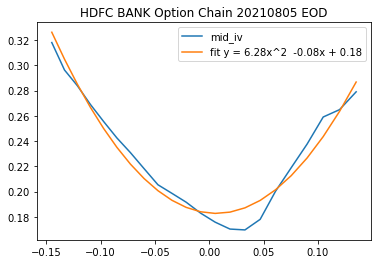

In [254]:
ax = plt.gca()
oc1.plot(ax)
ax.legend(['mid_iv', 'fit y = %.2fx^2  %.2fx + %.2f' % (model1.params[0], model1.params[1], model1.params[2])])
ax.set_title('HDFC BANK Option Chain 20210805 EOD')

Text(0.5, 1.0, 'HDFC BANK Option Chain 20210806 SOD')

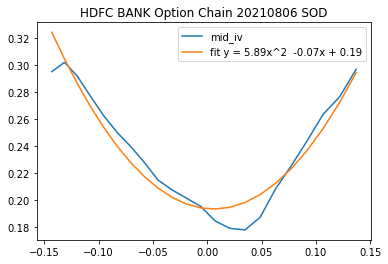

In [255]:
ax = plt.gca()
oc2.plot(ax)

ax.legend(['mid_iv', 'fit y = %.2fx^2  %.2fx + %.2f' % (model2.params[0], model2.params[1], model2.params[2])])
ax.set_title('HDFC BANK Option Chain 20210806 SOD')

In [256]:
max_moneyness=0.1
moneys  = np.linspace(-max_moneyness, max_moneyness, num=int(9))
strikes = oc1.future_price() * np.exp(moneys)
res1    = oc1.ivs_prices_greeks(strikes)
res1[['moneyness', 'futPrice', 'instrument', 'fit_iv', 'fit_price', 'delta', 'gamma', 'vega', 'theta', 'greek_0', 'greek_1', 'greek_2']]

,moneyness,moneyness,futPrice,instrument,fit_iv,fit_price,delta,gamma,vega,theta,greek_0,greek_1,greek_2
0,0.100,0.100,148805.0,p,0.237761,132.678076,-0.038038,0.000010,2966.244541,-6071.881328,0.010000,0.100,1.0
1,0.075,0.075,148805.0,p,0.212273,231.970637,-0.067889,0.000017,4702.560326,-8594.178710,0.005625,0.075,1.0
2,0.050,0.050,148805.0,p,0.194636,499.315237,-0.137981,0.000032,7903.132161,-13243.370524,0.002500,0.050,1.0
3,0.025,0.025,148805.0,p,0.184851,1175.364991,-0.279786,0.000051,12066.946574,-19204.164639,0.000625,0.025,1.0
4,0.000,0.000,148805.0,p,0.182918,2616.646102,-0.491208,0.000061,14302.731776,-22524.278299,0.000000,0.000,1.0
5,-0.025,-0.025,148805.0,c,0.188836,1254.587100,0.299233,0.000051,12453.919903,-20247.294734,0.000625,-0.025,1.0
6,-0.050,-0.050,148805.0,c,0.202606,592.633736,0.158743,0.000033,8680.303389,-15141.300301,0.002500,-0.050,1.0
7,-0.075,-0.075,148805.0,c,0.224227,314.240356,0.086767,0.000020,5666.761003,-10939.559417,0.005625,-0.075,1.0
8,-0.100,-0.100,148805.0,c,0.253701,204.213764,0.054242,0.000012,3945.613467,-8618.113484,0.010000,-0.100,1.0


In [257]:
res2    = oc2.ivs_prices_greeks(strikes)
res2[['moneyness', 'futPrice', 'instrument', 'fit_iv', 'fit_price']]

,moneyness,moneyness,futPrice,instrument,fit_iv,fit_price
0,0.10183,0.10183,149077.5,p,0.247649,138.011651
1,0.07683,0.07683,149077.5,p,0.223102,244.964357
2,0.05183,0.05183,149077.5,p,0.205920,520.680008
3,0.02683,0.02683,149077.5,p,0.196103,1191.311328
4,0.00183,0.00183,149077.5,p,0.193650,2587.045490
5,-0.02317,-0.02317,149077.5,c,0.198563,1415.184427
6,-0.04817,-0.04817,149077.5,c,0.210841,676.453110
7,-0.07317,-0.07317,149077.5,c,0.230483,350.417001
8,-0.09817,-0.09817,149077.5,c,0.257491,215.330392


In [258]:
oc1.estimate_price_diff_df(oc2, moneys=moneys)

,delta_price,gamma_price,theta_price,vol_0_price,vol_1_price,vol_2_price,estimated_price_diff,actual_price_diff,abs_pricing_error,delta_exposure,%_pe_delta_exposure,%_pe_option_price
moneyness,,,,,,,,,,,,
-0.100,-10.365399,0.360198,-12.995338,-11.548554,2.649275,32.161129,0.261310,5.333575,5.072265,-5660.268489,0.089612,3.822987
-0.075,-18.499681,0.639609,-18.393683,-10.298585,3.150037,50.986912,7.584609,12.993720,5.409112,-10102.183722,0.053544,2.331809
-0.050,-37.599838,1.172331,-28.344112,-7.692365,3.529306,85.688704,16.754026,21.364770,4.610744,-20532.271085,0.022456,0.923413
-0.025,-76.241605,1.884733,-41.101696,-2.936284,2.694371,130.834332,15.133851,15.946337,0.812486,-41633.512011,0.001952,0.069126
0.000,-133.854126,2.257551,-48.207566,-0.000000,0.000000,155.075548,-24.728593,-29.600613,-4.872020,-73094.176949,-0.006665,-0.186193
0.025,81.540965,1.904125,-43.334254,-3.030447,-2.780777,135.030041,169.329654,160.597328,-8.732326,44527.351610,-0.019611,-0.696032
0.050,43.257503,1.236964,-32.406154,-8.448810,-3.876367,94.115084,93.878219,83.819373,-10.058846,23621.771425,-0.042583,-1.697312
0.075,23.643922,0.729660,-23.413382,-12.410180,-3.795912,61.441135,46.195242,36.176645,-10.018597,12911.316645,-0.077595,-3.188196
0.100,14.780852,0.449022,-18.444909,-15.361555,-3.523989,42.779812,20.679231,11.116627,-9.562604,8071.429926,-0.118475,-4.682644


In [273]:
oc1.df

,level_0,strike,askPrice_1,bidPrice_1,futPrice,spread,time_to_expiry,moneyness,instrument,bid_iv,ask_iv,mid_iv,spread_iv,fit_iv
27892,2021-08-05 15:15:00,130000,80.0,75.0,148805.0,5.0,0.058076,0.135102,p,0.277638,0.280453,0.279046,0.002815,0.279514
27893,2021-08-05 15:15:00,132000,110.0,100.0,148805.0,10.0,0.058076,0.119835,p,0.262758,0.267081,0.264920,0.004323,0.257894
27894,2021-08-05 15:15:00,134000,180.0,160.0,148805.0,20.0,0.058076,0.104797,p,0.256070,0.262099,0.259085,0.006029,0.239312
27895,2021-08-05 15:15:00,136000,210.0,195.0,148805.0,15.0,0.058076,0.089982,p,0.235732,0.239503,0.237617,0.003771,0.223640
27896,2021-08-05 15:15:00,138000,265.0,255.0,148805.0,10.0,0.058076,0.075383,p,0.217909,0.219924,0.218916,0.002015,0.210753
27897,2021-08-05 15:15:00,140000,350.0,335.0,148805.0,15.0,0.058076,0.060994,p,0.199097,0.201499,0.200298,0.002403,0.200536
27898,2021-08-05 15:15:00,142000,440.0,430.0,148805.0,10.0,0.058076,0.046810,p,0.177313,0.178612,0.177963,0.001298,0.192877
27899,2021-08-05 15:15:00,144000,720.0,710.0,148805.0,10.0,0.058076,0.032823,p,0.169089,0.170071,0.169580,0.000981,0.187671
27900,2021-08-05 15:15:00,146000,1270.0,1260.0,148805.0,10.0,0.058076,0.019030,p,0.169864,0.170650,0.170257,0.000786,0.184819
27901,2021-08-05 15:15:00,148000,2130.0,2120.0,148805.0,10.0,0.058076,0.005424,p,0.175371,0.176078,0.175725,0.000707,0.184225


In [214]:
model1 = IVPolynomial(2)
model2 = IVPolynomial(2)

oc1.fit_iv_model(model1)
oc2.fit_iv_model(model2)

array([ 0.00244661,  0.00417726,  0.01053195,  0.0070581 ,  0.00212905,
       -0.00408603, -0.01681655, -0.02029   , -0.01558758, -0.00887237,
        0.00115849,  0.00435853,  0.00545352,  0.00597206,  0.01047561,
        0.01180165,  0.01010851,  0.00859356,  0.00761586,  0.00549458,
       -0.00253216, -0.02919065])

In [215]:
max_moneyness=0.15
moneys  = np.linspace(-max_moneyness, max_moneyness, num=int(5))
strikes = oc1.future_price() * np.exp(moneys)
res1    = oc1.ivs_prices_greeks(strikes)
res1

,strike,futPrice,moneyness,instrument,time_to_expiry,fit_iv,delta,gamma,theta,vega,fit_price,moneyness,greek_0,greek_1,greek_2
0,128077.650432,148805.0,0.150,p,0.058076,0.312292,-0.021140,0.000005,-4892.808072,1819.789459,89.805347,0.150,0.022500,0.150,1.0
1,138052.869483,148805.0,0.075,p,0.058076,0.212273,-0.067889,0.000017,-8594.178710,4702.560326,231.970637,0.075,0.005625,0.075,1.0
2,148805.000000,148805.0,0.000,p,0.058076,0.182918,-0.491208,0.000061,-22524.278299,14302.731776,2616.646102,0.000,0.000000,0.000,1.0
3,160394.551072,148805.0,-0.075,c,0.058076,0.224227,0.086767,0.000020,-10939.559417,5666.761003,314.240356,-0.075,0.005625,-0.075,1.0
4,172886.744489,148805.0,-0.150,c,0.058076,0.336202,0.035081,0.000006,-8035.720600,2776.186465,162.737383,-0.150,0.022500,-0.150,1.0


In [216]:
oc1.estimate_price_diff_df(oc2, max_moneyness=0.15)

,delta_price,gamma_price,theta_price,vol_0_price,vol_1_price,vol_2_price,estimated_price_diff,actual_price_diff,abs_pricing_error,delta_exposure,%_pe_delta_exposure,%_pe_option_price
moneyness,,,,,,,,,,,,
-0.15,-5.760700,0.168242,-10.471828,-15.941321,2.437993,19.730836,-9.836779,-4.522194,5.314586,-3145.765143,0.168944,5.917894
-0.14,-6.116536,0.187433,-10.401211,-14.607799,2.393625,20.755461,-7.789026,-2.710540,5.078486,-3340.077758,0.152047,5.604820
-0.13,-6.668583,0.213257,-10.572496,-13.545365,2.390269,22.320693,-5.862224,-0.918597,4.943627,-3641.535509,0.135757,5.241265
-0.12,-7.485523,0.248178,-11.022867,-12.713206,2.430375,24.586475,-3.956568,0.948163,4.904732,-4087.645022,0.119989,4.824061
-0.11,-8.668376,0.295612,-11.806047,-12.065957,2.516335,27.770268,-1.958165,2.994960,4.953125,-4733.569438,0.104638,4.350987
-0.10,-10.365399,0.360198,-12.995338,-11.548554,2.649275,32.161129,0.261310,5.333575,5.072265,-5660.268489,0.089612,3.822987
-0.09,-12.791965,0.448004,-14.684421,-11.089641,2.826665,38.127309,2.835950,8.066539,5.230588,-6985.351920,0.074879,3.247162
-0.08,-16.254175,0.566423,-16.982195,-10.595239,3.038226,46.103560,5.876602,11.248395,5.371793,-8875.972250,0.060521,2.639625
-0.07,-21.170574,0.723358,-19.995631,-9.947262,3.259905,56.534190,9.403986,14.809014,5.405028,-11560.686962,0.046754,2.026647


In [ ]:
ts = TickerSet("20210805 15:15:00", "20210806 10:00:00", tickers=['HDFCBANK'])

In [ ]:

oc1 = oc_pairs['HDFCBANK'][0]
oc1.fit_iv_model(model1)
print(model1.calibrated_params)

Text(0.5, 1.0, 'HDFC BANK Option Chain 20210805 EOD')

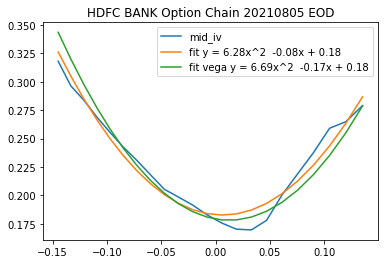

In [299]:
ax = plt.gca()

model = IVPolynomial(2)
oc1.fit_iv_model(model)
ax.plot(oc1.df['moneyness'], oc1.df['mid_iv'])
ax.plot(oc1.df['moneyness'], oc1.df['fit_iv'])

l = (model.params[0], model.params[1], model.params[2])


model = IVPolynomial(2, weighting="vega")
oc1.fit_iv_model(model)
ax.plot(oc1.df['moneyness'], oc1.df['fit_iv'])

l2 = (model.params[0], model.params[1], model.params[2])

ax.legend(['mid_iv', 'fit y = %.2fx^2  %.2fx + %.2f' % l, 'fit vega y = %.2fx^2  %.2fx + %.2f' % l2])
ax.set_title('HDFC BANK Option Chain 20210805 EOD')

[-0.004549704823005055, 0.0005815757624717935, 0.00637452213698101, 0.00705375637521115, 0.12112706019212183]


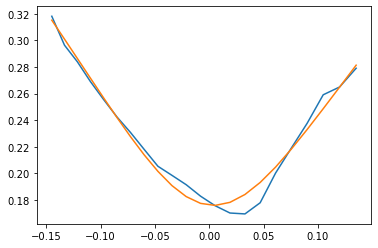

In [91]:
model1 = SVIModel(tolerance=1e-7)
oc1 = oc_pairs['HDFCBANK'][0]
oc1.fit_iv_model(model1)
print(model1.calibrated_params)

ax = plt.gca()
oc1.plot(ax=ax)

In [ ]:
[-0.002714860717066058, -0.001237982944667365, 0.0047759778307003495, -0.04457293547500786, 0.09733773597283424]


[-0.005977401202862068, 0.0008469738505436508, 0.008035458492102233, 0.01328848121185711, 0.14535611259196357]


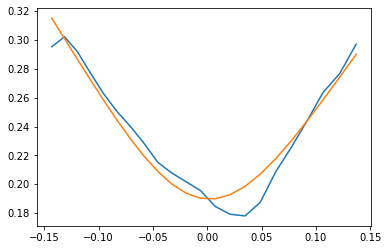

In [78]:
model2 = SVIModel()
oc2 = oc_pairs['HDFCBANK'][1]
oc2.fit_iv_model(model2)
print(model2.calibrated_params)

ax = plt.gca()
oc2.plot(ax=ax)

[-0.004462885569108942, 0.0005747164712998381, 0.00647892962630842, 0.007394928635117299, 0.12837513443178827]


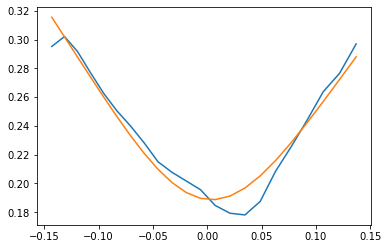

In [79]:
model2 = SVIModel(init_guess_calibrated_params=model1.calibrated_params)
oc2 = oc_pairs['HDFCBANK'][1]
oc2.fit_iv_model(model2)
print(model2.calibrated_params)

ax = plt.gca()
oc2.plot(ax=ax)

[-0.002936951654203315, -0.00011395529778567928, 0.004868356856862456, -0.010949043248337589, 0.10620281456635408]


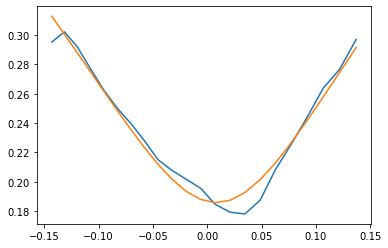

In [87]:
model2 = SVIModel(init_guess_calibrated_params=model1.calibrated_params, tolerance=1e-8)
oc2 = oc_pairs['HDFCBANK'][1]
oc2.fit_iv_model(model2)
print(model2.calibrated_params)

ax = plt.gca()
oc2.plot(ax=ax)

In [188]:
oc_pairs = ts.get_option_chain_pairs()

model_1 = IVPolynomial(2)
model_2 = SVIModel()
# model_2 = IVPolynomial(3, smoothening="kernel_smoothening")
# model_3 = IVPolynomial(2, weighting="inverse_spread")
# model_4 = IVPolynomial(2, smoothening="kernel_smoothening", weighting="inverse_spread")
models = [model_1, model_2]
# models = [model_1, model_2, model_3, model_4]

In [189]:
model_errors = get_errors_for_models(oc_pairs, models)

In [192]:
model_errors[1][0]


,HDFCBANK
moneyness,
-0.15,0.399212
-0.14,0.377028
-0.13,0.354619
-0.12,0.331893
-0.11,0.308746
-0.10,0.285069
-0.09,0.260762
-0.08,0.235764
-0.07,0.210096


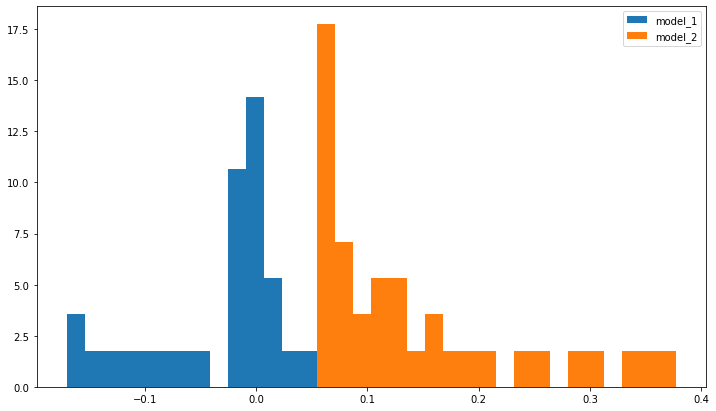

In [190]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 7)

for tickerwise_e, aggregated_e in model_errors:
    axs.hist(aggregated_e['ALL'], density=True, bins=20)
axs.legend([f'model_{i+1}' for i in range(len(model_errors))])

In [170]:
rows = []
for i, (tickerwise_e, aggregated_e) in enumerate(model_errors):
    row = {
        'model': f'model_{i+1}',
        'pricing_mae' : np.mean(np.abs(aggregated_e['ALL'])),
        'pricing_rmse' : np.sqrt(np.mean((aggregated_e['ALL'])**2)),
        'fit_mae' : np.mean(np.abs(np.array(aggregated_e['fit_errors']))),
        'fit_rmse' : np.sqrt(np.mean((np.array(aggregated_e['fit_errors']))**2)),
    } 
    rows.append(row)

pd.DataFrame(rows)

,model,pricing_mae,pricing_rmse,fit_mae,fit_rmse
0,model_1,0.058377,0.080055,0.008094,0.009944
1,model_2,0.144111,0.171252,0.008225,0.010195


In [134]:
isinstance(res1, SVIModel)

False

In [131]:
str(type(model2))

"<class 'iv_models.SVIModel'>"

In [ ]:
oc_pairs['RELIANCE'][0].df

In [ ]:
s = [1]
s.extend(np.array([2, 3]))
s

In [ ]:
kernel_smoothening(oc_pairs['IDEA'][0])

In [ ]:
oc_pairs